In [124]:
# Do semantic compression on an image to get a smaller image, adjust the JPEG (?) compression ratio on the original image
# to get a compressed image of the same size as the semantically compressed image, do the same thing for an entire dataset,
# then train a model with k-fold validation and see if semantic compression performs better than JPEG compresssion. After
# that, write a paper!

import numpy as np
import matplotlib.pyplot as plt
from collections import deque

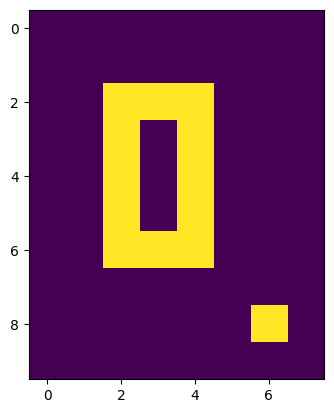

In [118]:
mask = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 1, 1, 1, 0, 0, 0],
                [0, 0, 1, 0, 1, 0, 0, 0],
                [0, 0, 1, 0, 1, 0, 0, 0],
                [0, 0, 1, 0, 1, 0, 0, 0],
                [0, 0, 1, 1, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 1, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],])
plt.imshow(mask)

In [125]:
from collections import deque

ROWS = mask.shape[0]
COLUMNS = mask.shape[1]
OUT_MASK_VALUE = 0
INITIAL_MASK_VALUE = 1

# Queue has default mask positions
queue = deque()
for i in range(ROWS):
    for j in range(COLUMNS):
        if mask[i, j] == INITIAL_MASK_VALUE:
            queue.append((i, j))

# BFS
CYCLE = 2
while queue:
    next_queue = deque()
    while queue:
        i, j = queue.popleft()
        for rowOffset in [-1, 0, 1]:
            for columnOffset in [-1, 0, 1]:
                neighbor_i = i + rowOffset
                neighbor_j = j + columnOffset
                if 0 <= neighbor_i < ROWS and 0 <= neighbor_j < COLUMNS:
                    if mask[neighbor_i, neighbor_j] == OUT_MASK_VALUE:
                        mask[neighbor_i, neighbor_j] = CYCLE
                        next_queue.append((neighbor_i, neighbor_j))
    queue = next_queue
    CYCLE += 1

In [126]:
mask

array([[3, 3, 3, 3, 3, 3, 3, 4],
       [3, 2, 2, 2, 2, 2, 3, 4],
       [3, 2, 1, 1, 1, 2, 3, 4],
       [3, 2, 1, 2, 1, 2, 3, 4],
       [3, 2, 1, 2, 1, 2, 3, 4],
       [3, 2, 1, 2, 1, 2, 3, 4],
       [3, 2, 1, 1, 1, 2, 3, 3],
       [3, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 2, 1, 2],
       [4, 4, 4, 4, 3, 2, 2, 2]])

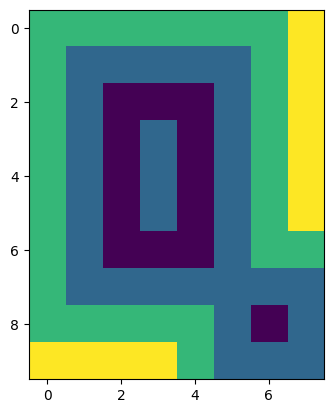

In [127]:
plt.imshow(mask)